<a href="https://colab.research.google.com/github/Keita062/work/blob/main/Eye_11_12_ipynb_%E3%81%AE%E7%B5%B1%E5%90%88%E3%83%90%E3%83%BC%E3%82%B8%E3%83%A7%E3%83%B3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
Eye = pd.read_csv('/content/DO - コピー.csv')

In [16]:
Eye.head()

,DataCount,TIME(Y/M/D h:m:s),milliSeconds,leftX,leftY,rightX,rightY,leftPSize,rightPSize
0,2,2024/11/2 18:13,535,770.9930,542.5826,744.4664,567.8753,16.6672,17.0328
1,3,2024/11/2 18:13,581,783.1512,470.1998,757.0742,569.6154,14.4211,14.9066
2,4,2024/11/2 18:13,612,759.7722,475.1764,756.7003,557.0222,14.3276,14.7274
3,5,2024/11/2 18:13,644,775.8635,485.2859,749.9686,561.2388,14.6416,14.8207
4,6,2024/11/2 18:13,676,778.5135,487.6267,752.9910,566.4250,14.2361,15.1852


In [17]:
want = Eye.iloc[:, 2:9]
want.head()
# 7列中4列以上が0の行をすべて0にする
want[(want == 0).sum(axis=1) >= 4] = 0
# 7列中4列未満が0の行で0でない前の行まで遡って補完
for i in range(1, len(want)):  # 2行目以降で実行
    if (want.iloc[i] == 0).sum() < 4:  # 0が4列未満の行のみ
        for col in want.columns:  # 各列ごとに補完を確認
            if want.iloc[i][col] == 0:
                # 0でない値を見つけるまで遡って補完
                j = i - 1
                while j >= 0 and want.iloc[j][col] == 0:
                    j -= 1
                if j >= 0:  # 0でない値が見つかった場合
                    want.at[i, col] = want.iloc[j][col]  # 0でない値を設定

# 3行以上連続して0がある部分を「まばたき」として検出
blink_rows = []
zero_count = 0

for i in range(len(want)):
    if (want.iloc[i] == 0).all():  # 行がすべて0の場合
        zero_count += 1
    else:
        if zero_count >= 3:
            blink_rows.append((i - zero_count, i - 1))  # まばたきの行範囲を記録
        zero_count = 0

# 最後の行が連続する0で終わっていた場合も処理
if zero_count >= 3:
    blink_rows.append((len(want) - zero_count, len(want) - 1))

print("Blinks detected at rows:", blink_rows)

# 瞬きの数をカウントする変数
blink_count = 0
zero_count = 0  # 連続して0が続いている行数

# 行ごとにすべての列が0かを確認
for i in range(len(want)):
    if (want.iloc[i] == 0).all():  # 行のすべての列が0の場合
        zero_count += 1
    else:
        if zero_count >= 3:  # 3行以上連続して0が続いていた場合
            blink_count += 1
        zero_count = 0  # 連続カウントをリセット

# データフレームの最後まで0が連続していた場合のチェック
if zero_count >= 3:
    blink_count += 1

print("瞬きの数:", blink_count)


want["gazeX"] = (want["leftX"] + want["rightX"]) / 2
want["gazeY"] = (want["leftY"] + want["rightY"]) / 2

use = Eye.iloc[:, [0, 1]]
result = pd.concat([use,want],axis=1)

result.head()


Blinks detected at rows: [(143, 150), (235, 240), (273, 279), (632, 635), (741, 744), (945, 949), (1130, 1136), (1317, 1319), (1525, 1531), (1623, 1629), (1643, 1650), (1812, 1816), (1872, 1876), (2057, 2061), (2206, 2209), (2392, 2398)]
瞬きの数: 16


,DataCount,TIME(Y/M/D h:m:s),milliSeconds,leftX,leftY,rightX,rightY,leftPSize,rightPSize,gazeX,gazeY
0,2,2024/11/2 18:13,535,770.9930,542.5826,744.4664,567.8753,16.6672,17.0328,757.72970,555.22895
1,3,2024/11/2 18:13,581,783.1512,470.1998,757.0742,569.6154,14.4211,14.9066,770.11270,519.90760
2,4,2024/11/2 18:13,612,759.7722,475.1764,756.7003,557.0222,14.3276,14.7274,758.23625,516.09930
3,5,2024/11/2 18:13,644,775.8635,485.2859,749.9686,561.2388,14.6416,14.8207,762.91605,523.26235
4,6,2024/11/2 18:13,676,778.5135,487.6267,752.9910,566.4250,14.2361,15.1852,765.75225,527.02585


In [20]:
Eye5_mean = result.groupby(result.index // 5)[["gazeX", "gazeY"]].mean()
Eye5_mean.head(35)

,gazeX,gazeY
0,762.94939,528.30481
1,766.78340,543.86966
2,766.91277,569.92702
3,767.32676,593.96918
4,766.35856,612.87365
5,767.59548,629.49422
6,1103.73074,648.61041
7,1156.06640,649.62728
8,1179.05440,667.10496
9,1196.99290,674.24117


In [21]:
gazeX = Eye5_mean["gazeX"]
gazeY = Eye5_mean["gazeY"]

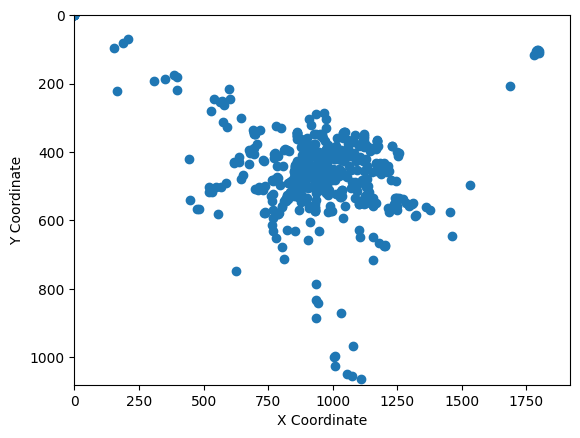

In [25]:
# 散布図の作成
plt.scatter(gazeX,gazeY)

# タイトルとラベルの設定
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')

# 座標軸の範囲を設定
plt.xlim(0, 1920)
plt.ylim(0, 1080)

# y軸を反転して左上を (0, 0) に、右下を (1920, 1080) に設定
plt.gca().invert_yaxis()

# プロットを表示
plt.show()


In [26]:
centerX = 960
centerY = 540

In [29]:
Eye5_mean["SD_X"] = abs(Eye5_mean["gazeX"] - centerX)
Eye5_mean["SD_Y"] = abs(Eye5_mean["gazeY"] - centerY)
Eye5_mean.describe()

,gazeX,gazeY,SD_X,SD_Y
count,572.000000,572.000000,572.000000,572.000000
mean,940.644888,452.788458,153.189478,121.255394
std,238.623520,137.734581,183.870461,108.909908
min,0.000000,0.000000,0.134780,0.119880
25%,859.831072,398.288632,35.113310,48.790063
50%,950.301485,449.798200,97.685315,100.703720
75%,1042.653575,510.687633,192.563942,149.729010
max,1797.298200,1100.801100,960.000000,560.801100


In [30]:
(Eye5_mean["gazeX"] == 960).sum()

0

In [32]:
(Eye5_mean["gazeY"] == 540).sum()

0

In [35]:
print(Eye5_mean["gazeX"].count())
print(Eye5_mean["gazeY"].count())

572
572


In [38]:
Eye5_mean["gazeX"].value_counts().sort_values(ascending=False)

,count
gazeX,
0.000000,8
1196.992900,1
852.738650,1
854.821380,1
881.037160,1
...,...
1006.254470,1
1009.067460,1
1777.189500,1


In [39]:
Eye5_mean["gazeY"].value_counts().sort_values(ascending=False)

,count
gazeY,
0.000000,8
674.241170,1
458.443340,1
457.929240,1
530.784040,1
...,...
998.164050,1
1025.909480,1
116.720320,1


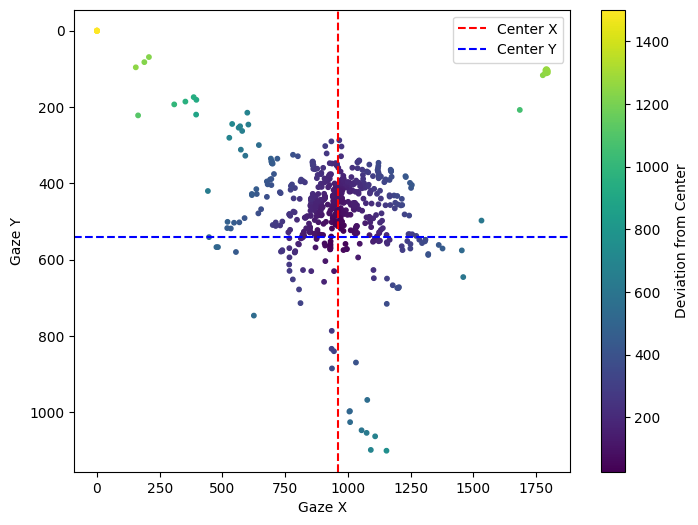

In [42]:
import matplotlib.pyplot as plt

# 画面サイズ
screen_width = 1920
screen_height = 1080

# 中心座標
centerX = screen_width / 2
centerY = screen_height / 2

# 中心からの逸脱量を計算
Eye5_mean["SD_X"] = abs(Eye5_mean["gazeX"] - centerX)
Eye5_mean["SD_Y"] = abs(Eye5_mean["gazeY"] - centerY)

# 散布図を作成
plt.figure(figsize=(8, 6))
plt.scatter(Eye5_mean["gazeX"], Eye5_mean["gazeY"], c=Eye5_mean["SD_X"] + Eye5_mean["SD_Y"], cmap='viridis', s=10)
plt.colorbar(label='Deviation from Center')  # 色を逸脱量に基づいて表示

# 中心の座標を赤線と青線で表示
plt.axvline(x=centerX, color='red', linestyle='--', label='Center X')
plt.axhline(y=centerY, color='blue', linestyle='--', label='Center Y')

# グラフのタイトルと軸ラベル
plt.xlabel('Gaze X')
plt.ylabel('Gaze Y')
# y軸を反転して左上を (0, 0) に、右下を (1920, 1080) に設定
plt.gca().invert_yaxis()
plt.legend()

# プロットを表示
plt.show()


In [43]:
Eye5_mean.head()

,gazeX,gazeY,SD_X,SD_Y
0,762.94939,528.30481,197.05061,11.69519
1,766.78340,543.86966,193.21660,3.86966
2,766.91277,569.92702,193.08723,29.92702
3,767.32676,593.96918,192.67324,53.96918
4,766.35856,612.87365,193.64144,72.87365


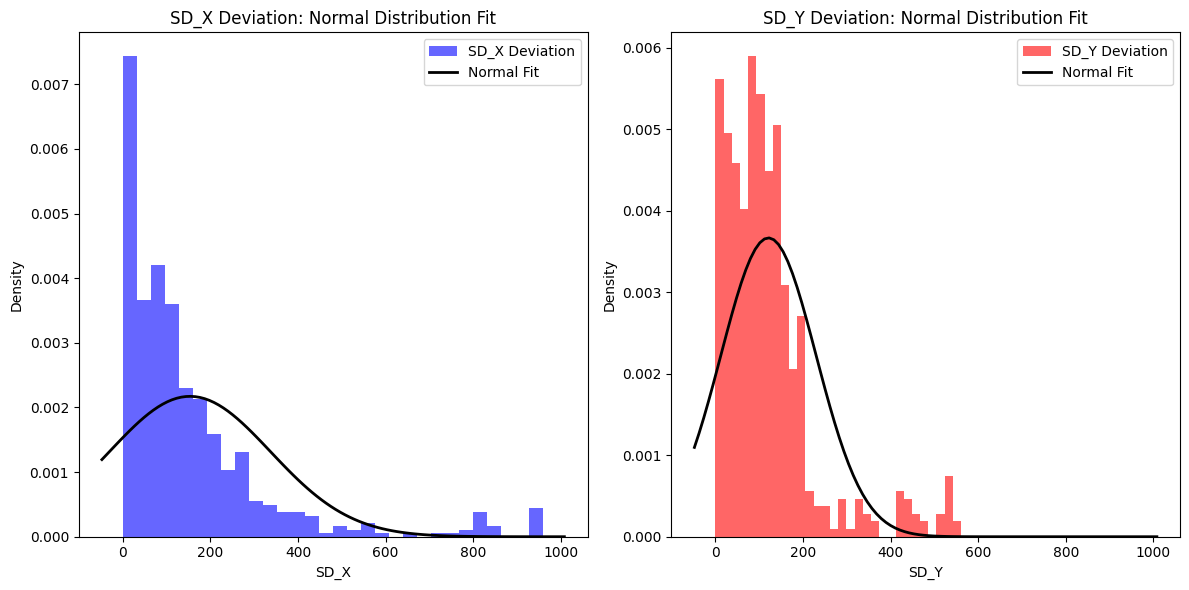

In [47]:
# SD_X と SD_Y の逸脱量を個別に取得
Eye5_mean["SD_X"] = abs(Eye5_mean["gazeX"] - centerX)
Eye5_mean["SD_Y"] = abs(Eye5_mean["gazeY"] - centerY)

# SD_X のヒストグラム
plt.figure(figsize=(12, 6))

# SD_X のヒストグラムを描く
plt.subplot(1, 2, 1)
plt.hist(Eye5_mean["SD_X"], bins=30, density=True, alpha=0.6, color='b', label='SD_X Deviation')

# 正規分布のフィットを追加
mu_X, std_X = stats.norm.fit(Eye5_mean["SD_X"])
xmin, xmax = plt.xlim()  # x軸の範囲を取得
x = np.linspace(xmin, xmax, 100)
p_X = stats.norm.pdf(x, mu_X, std_X)
plt.plot(x, p_X, 'k', linewidth=2, label='Normal Fit')

plt.title('SD_X Deviation: Normal Distribution Fit')
plt.xlabel('SD_X')
plt.ylabel('Density')
plt.legend()

# SD_Y のヒストグラムを描く
plt.subplot(1, 2, 2)
plt.hist(Eye5_mean["SD_Y"], bins=30, density=True, alpha=0.6, color='r', label='SD_Y Deviation')

# 正規分布のフィットを追加
mu_Y, std_Y = stats.norm.fit(Eye5_mean["SD_Y"])
p_Y = stats.norm.pdf(x, mu_Y, std_Y)
plt.plot(x, p_Y, 'k', linewidth=2, label='Normal Fit')

plt.title('SD_Y Deviation: Normal Distribution Fit')
plt.xlabel('SD_Y')
plt.ylabel('Density')
plt.legend()

plt.tight_layout()
plt.show()


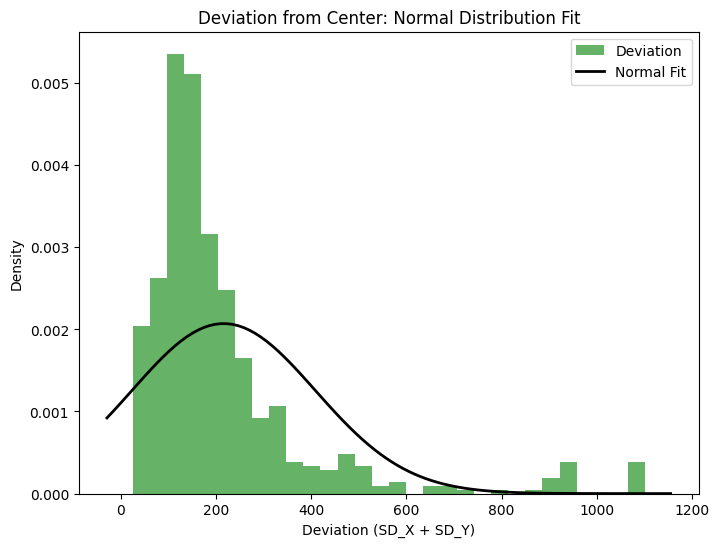

In [48]:
# 逸脱量を計算 (SD_X と SD_Y の統合)
Eye5_mean["SD_Combined"] = np.sqrt(Eye5_mean["SD_X"]**2 + Eye5_mean["SD_Y"]**2)

# ヒストグラムをプロット
plt.figure(figsize=(8, 6))
plt.hist(Eye5_mean["SD_Combined"], bins=30, density=True, alpha=0.6, color='g', label='Deviation')

# 正規分布のフィットを追加
mu, std = stats.norm.fit(Eye5_mean["SD_Combined"])

# 正規分布の確率密度関数 (PDF) をプロット
xmin, xmax = plt.xlim()  # x軸の範囲を取得
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2, label='Normal Fit')

# グラフのタイトルとラベル
plt.title('Deviation from Center: Normal Distribution Fit')
plt.xlabel('Deviation (SD_X + SD_Y)')
plt.ylabel('Density')
plt.legend()

# プロットを表示
plt.show()
